# Simple Linear Regression - Sales Prediction Example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

* Set Option

In [3]:
pd.set_option('display.max_columns', None) # Show All Columns
pd.set_option('display.max_rows', None) # Show All Rows
pd.set_option('display.float_format', lambda x: '%.3f' % x) # After Comma 3 Digit
pd.set_option('display.width', 500) # Show 500 Width

* Load Data

In [4]:
df = pd.read_csv("data/advertising.csv")

* Discover Data

In [5]:
df.shape

(200, 4)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.nunique().sort_values(ascending=False)

TV           190
newspaper    172
radio        167
sales        121
dtype: int64

In [9]:
df["sales"].value_counts()

sales
9.700     5
11.700    4
12.900    4
15.900    4
20.700    3
25.400    3
15.500    3
18.000    3
11.900    3
8.700     3
9.500     3
11.600    3
10.600    3
12.200    3
13.200    3
11.800    3
10.100    3
13.400    3
11.400    2
22.600    2
20.200    2
23.800    2
10.300    2
14.800    2
10.900    2
14.900    2
10.800    2
10.400    2
17.100    2
11.000    2
19.600    2
5.300     2
15.200    2
6.600     2
7.300     2
11.500    2
12.600    2
8.800     2
19.200    2
16.600    2
10.500    2
9.300     2
7.200     2
17.400    2
17.300    2
19.000    2
12.500    2
11.300    2
12.000    2
15.000    2
18.900    2
14.600    2
7.600     2
14.700    2
12.800    2
9.600     2
15.600    1
6.700     1
13.300    1
7.000     1
14.500    1
9.900     1
9.400     1
24.700    1
8.000     1
5.900     1
21.800    1
14.100    1
19.700    1
17.600    1
1.600     1
16.100    1
12.700    1
5.700     1
26.200    1
14.400    1
8.400     1
27.000    1
20.800    1
15.300    1
3.200     1
20.100    1
22.100    

In [10]:
df.isnull().sum().sort_values(ascending=False)

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.000,147.042,85.854,0.700,74.375,149.750,218.825,296.400
radio,200.000,23.264,14.847,0.000,9.975,22.900,36.525,49.600
newspaper,200.000,30.554,21.779,0.300,12.750,25.750,45.100,114.000
sales,200.000,14.023,5.217,1.600,10.375,12.900,17.400,27.000


In [12]:
df.quantile([0, 0.05, 0.50, 0.90, 0.99, 1]).T

,0.000,0.050,0.500,0.900,0.990,1.000
TV,0.700,13.195,149.750,261.440,292.907,296.400
radio,0.000,1.995,22.900,43.520,49.400,49.600
newspaper,0.300,3.600,25.750,59.070,89.515,114.000
sales,1.600,6.600,12.900,21.710,25.507,27.000


In [15]:
corr = df.drop("sales",axis=1).corr().abs()
corr_values = corr.unstack()
corr_values_sort = corr_values.sort_values(kind='quicksort',ascending=False)
corr_values_sort[corr_values_sort>0.1]

TV         TV          1.000
radio      radio       1.000
newspaper  newspaper   1.000
radio      newspaper   0.354
newspaper  radio       0.354
dtype: float64

* Split Data For Basic Linear Regression

In [21]:
X = df[["TV"]]
y = df[["sales"]]

* Model Train For Basic Linear Regression

In [22]:
reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
print("bias: ",reg_model.intercept_[0])

# Coefficient of TV (w1)
print("Coefficient: ",reg_model.coef_[0][0])

bias:  7.032593549127695
Coefficient:  0.04753664043301975


* Prediction

In [23]:
# How much sales are expected if there is a TV expenditure of 150 units?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

* Plot The Model

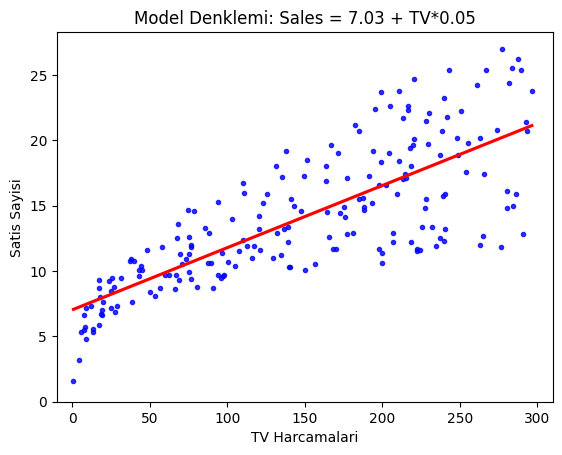

In [24]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

* Model Success

In [30]:
print("Sales mean: ", y.mean().iloc[0])
print("Sales std: ", y.std().iloc[0])

Sales mean:  14.0225
Sales std:  5.217456565710478


In [31]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [32]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [33]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [34]:
# R-KARE
# Bu yöntem şunu ifade eder.
# Verdiğimiz bağımsız değişken bağımlı değişkeni ne kadar ifade etmektedir.
# Bu veri için TV bağımsız değişkeni %61 değerini vermiştir.
# Burada X değerleri arttıkça R-kare artmaya  meyillidir.
reg_model.score(X, y)

0.611875050850071